In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def xgb_model_init(X_train,y_train):
    xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='auc',random_state=2022)
    xgb_clf.fit(X_train,y_train)
    
    return xgb_clf

def xgb_model_tuned(X_train,y_train):
    grid_search = {
               'max_depth': [5,6,7],
               'min_child_weight': [1,2],
               'learning_rate': [0.1,0.2,0.3],
               'n_estimators': [50,100]}
    clf = XGBClassifier(objective='binary:logistic', eval_metric='auc',random_state=2022)
    grid = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 5, verbose= 5, n_jobs = -1)
    grid.fit(X_train,y_train)
    
    xgb_model=grid.best_estimator_
    return xgb_model

In [2]:
import import_ipynb
from preprocessing import load_data
from sklearn.model_selection import train_test_split

importing Jupyter notebook from preprocessing.ipynb


[IterativeImputer] Completing matrix with shape (143983, 63)
[IterativeImputer] Ending imputation round 1/20, elapsed time 19.63
[IterativeImputer] Change: 4339717.718252908, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 2/20, elapsed time 38.27
[IterativeImputer] Change: 109178.47474219964, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 3/20, elapsed time 56.74
[IterativeImputer] Change: 61326.23123222231, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 4/20, elapsed time 75.31
[IterativeImputer] Change: 47768.54785351781, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 5/20, elapsed time 93.96
[IterativeImputer] Change: 34219.36236036712, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 6/20, elapsed time 112.51
[IterativeImputer] Change: 22454.161775678534, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 7/20, elapsed time 130.92
[IterativeImputer] Ch

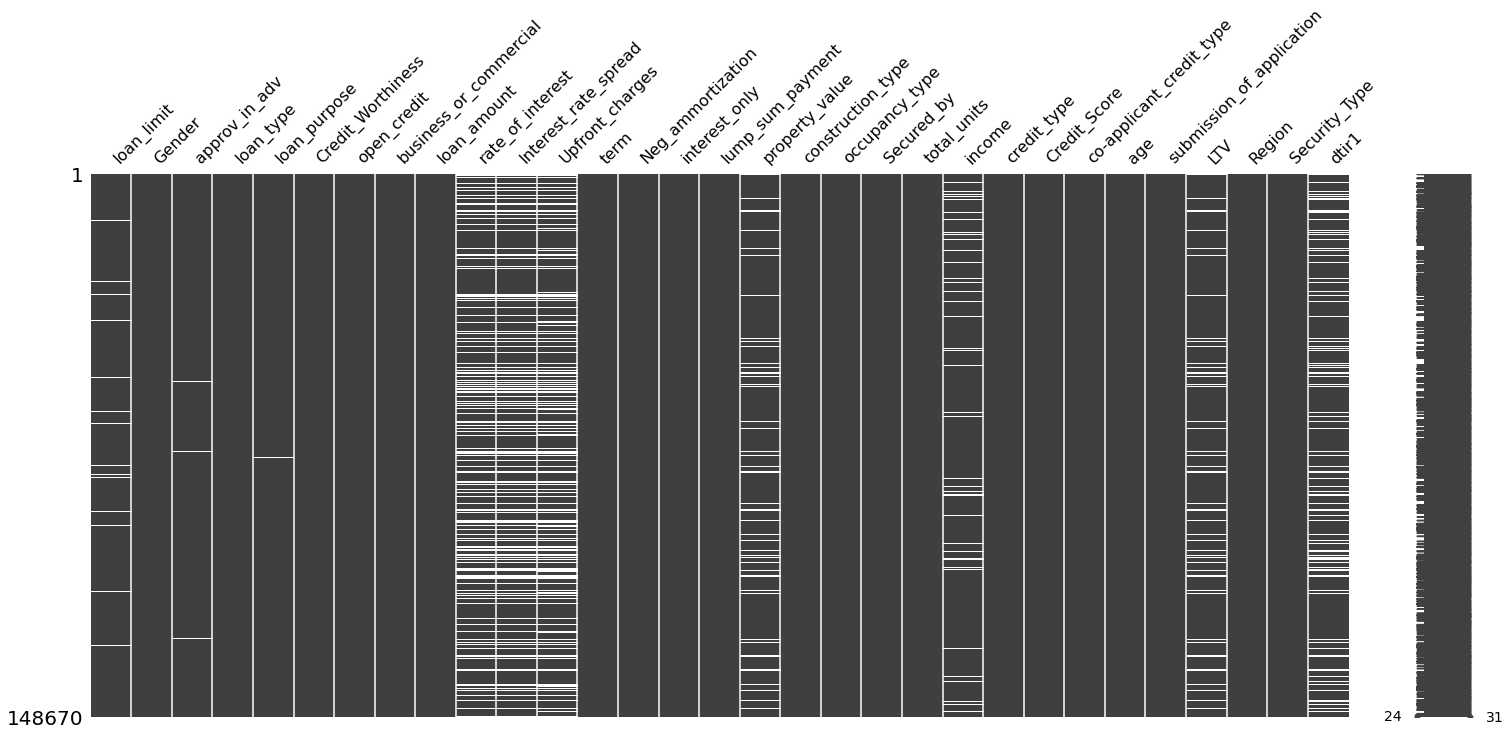

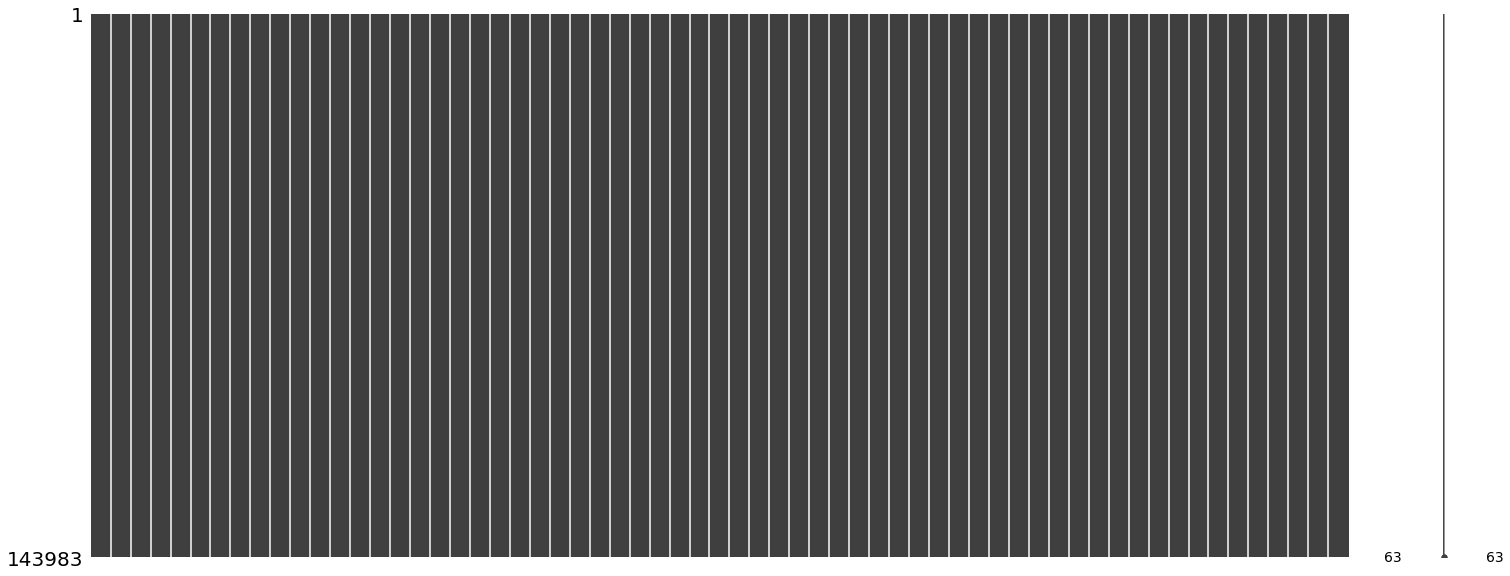

In [3]:
data,target = load_data('data/Loan_Default.csv')

In [4]:
X_train,X_test,y_train,y_test = train_test_split(data,target,train_size=0.7,random_state=2022)

In [5]:
model = xgb_model_init(X_train,y_train)

In [7]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'auc'}

In [9]:
model_tuned = xgb_model_tuned(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [10]:
model_tuned.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'auc'}

[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.993 total time=  29.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.993 total time=  28.5s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100;, score=0.994 total time=  36.0s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100;, score=0.994 total time=  33.9s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.997 total time=  41.4s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=100;, score=0.997 total time=  41.1s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.992 total time=  14.3s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.993 total time=  14.4s
[CV 3/5] END learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=50;,

/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use panda

[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.972 total time=  14.6s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.977 total time=  13.9s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.973 total time=  13.8s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.991 total time=  28.8s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=50;, score=0.981 total time=  17.2s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=50;, score=0.981 total time=  17.6s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50;, score=0.987 total time=  22.0s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.997 total time=  41.7s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=100;, sc

/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use panda

[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.993 total time=  28.7s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.992 total time=  28.5s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=50;, score=0.981 total time=  17.8s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=50;, score=0.983 total time=  17.8s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100;, score=0.995 total time=  33.1s
[CV 5/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50;, score=0.986 total time=  20.6s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=50;, score=0.989 total time=  20.5s
[CV 1/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=100;, score=0.997 total time=  41.5s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100;, 

/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use panda

[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.964 total time=  14.8s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.975 total time=  14.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.993 total time=  28.6s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100;, score=0.994 total time=  34.5s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=50;, score=0.971 total time=  17.5s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50;, score=0.985 total time=  22.1s
[CV 1/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=50;, score=0.988 total time=  20.0s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=50;, score=0.988 total time=  20.8s
[CV 2/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=50;, sco

/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use panda

[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.975 total time=  14.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.991 total time=  29.1s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=50;, score=0.982 total time=  17.6s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100;, score=0.996 total time=  35.2s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100;, score=0.995 total time=  33.7s
[CV 5/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.998 total time=  41.1s
[CV 5/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=100;, score=0.997 total time=  42.2s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.992 total time=  14.5s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100;,

/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use panda

[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.972 total time=  14.7s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.971 total time=  13.9s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=50;, score=0.971 total time=  14.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=50;, score=0.979 total time=  17.7s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100;, score=0.995 total time=  35.4s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100;, score=0.995 total time=  33.9s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.997 total time=  42.0s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.995 total time=  13.3s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=50;, sc

/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use panda

[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.990 total time=  28.9s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100;, score=0.990 total time=  28.4s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=50;, score=0.977 total time=  18.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=50;, score=0.979 total time=  17.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100;, score=0.995 total time=  34.3s
[CV 1/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100;, score=0.997 total time=  40.5s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=100;, score=0.996 total time=  41.8s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=100;, score=0.999 total time=  28.6s
[CV 2/5] END learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=50;,

/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/test_env/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use panda